In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	544089224.7294

Best Fitness:	185567749.1482
Solution:	100.0000
Diff:		185567649.1482

[0:03:53][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	539175779.9718

Best Fitness:	167539041.6425
Solution:	100.0000
Diff:		167538941.6425

[0:07:17][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	560001305.2173

Best Fitness:	244797141.2587
Solution:	100.0000
Diff:		244797041.2587

[0:10:39][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	610899032.2394

Best Fitness:	223010682.5484
Solution:	100.0000
Diff:		223010582.5484

[0:13:54][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	490517069.2113

Best Fitness:	147243570.9163
Solution:	100.0000
Diff:		147243470.9163

[0:17:02][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	471360192.9357

Best Fitness:	153174974.8806
Solution:	100.0000
Diff:		153174874.8806

[0:20:12][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	612498079.9306

Best Fitness:	183569458.4300
Solution:	100.0000
Diff:		183569358.4300

[0:23:22][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	574657318.3467

Best Fitness:	220364331.3628
Solution:	100.0000
Diff:		220364231.3628

[0:26:33][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	573306034.1568

Best Fitness:	221278117.5379
Solution:	100.0000
Diff:		221278017.5379

[0:29:47][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	661658873.4400

Best Fitness:	261281562.6717
Solution:	100.0000
Diff:		261281462.6717

[0:33:02][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	669111856.3944

Best Fitness:	243742122.4492
Solution:	100.0000
Diff:		243742022.4492

[0:36:15][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	494475479.2926

Best Fitness:	176213507.3869
Solution:	100.0000
Diff:		176213407.3869

[0:39:18][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	663046886.0575

Best Fitness:	281184091.0819
Solution:	100.0000
Diff:		281183991.0819

[0:42:16][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	595016998.3196

Best Fitness:	198535299.6466
Solution:	100.0000
Diff:		198535199.6466

[0:45:12][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	627405067.0445

Best Fitness:	196433056.2107
Solution:	100.0000
Diff:		196432956.2107

[0:48:24][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	500086092.2766

Best Fitness:	177716639.4440
Solution:	100.0000
Diff:		177716539.4440

[0:51:28][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	619330619.5032

Best Fitness:	217496617.9833
Solution:	100.0000
Diff:		217496517.9833

[0:54:23][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	443964841.5130

Best Fitness:	180966742.9281
Solution:	100.0000
Diff:		180966642.9281

[0:57:21][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	561889880.9982

Best Fitness:	126274693.0363
Solution:	100.0000
Diff:		126274593.0363

[1:00:13][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	490179932.6835

Best Fitness:	94887504.9737
Solution:	100.0000
Diff:		94887404.9737

[1:03:11][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	428551175.5120

Best Fitness:	132453084.0596
Solution:	100.0000
Diff:		132452984.0596

[1:06:05][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	667523281.4707

Best Fitness:	228647256.3548
Solution:	100.0000
Diff:		228647156.3548

[1:09:11][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	558779567.5280

Best Fitness:	169491180.5541
Solution:	100.0000
Diff:		169491080.5541

[1:12:20][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	449404752.6596

Best Fitness:	170567666.5256
Solution:	100.0000
Diff:		170567566.5256

[1:15:09][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	562633581.8578

Best Fitness:	179442361.6426
Solution:	100.0000
Diff:		179442261.6426

[1:18:08][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	655027635.6571

Best Fitness:	220624531.1876
Solution:	100.0000
Diff:		220624431.1876

[1:21:17][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	599719044.6389

Best Fitness:	212253935.4740
Solution:	100.0000
Diff:		212253835.4740

[1:24:13][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	665739244.0906

Best Fitness:	198991836.7221
Solution:	100.0000
Diff:		198991736.7221

[1:27:16][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	649982602.0617

Best Fitness:	288940722.7692
Solution:	100.0000
Diff:		288940622.7692

[1:30:07][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	647409412.6379

Best Fitness:	214400232.9290
Solution:	100.0000
Diff:		214400132.9290

[1:33:01][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	483614795.1589

Best Fitness:	154499939.6588
Solution:	100.0000
Diff:		154499839.6588

[1:35:52][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	681469935.0736

Best Fitness:	182718596.0132
Solution:	100.0000
Diff:		182718496.0132

[1:38:35][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	460469214.5132

Best Fitness:	147365609.2645
Solution:	100.0000
Diff:		147365509.2645

[1:41:09][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	570324622.7073

Best Fitness:	210552224.7683
Solution:	100.0000
Diff:		210552124.7683

[1:43:56][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	676670786.6313

Best Fitness:	188406411.1509
Solution:	100.0000
Diff:		188406311.1509

[1:46:42][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	638661491.1470

Best Fitness:	177722848.1826
Solution:	100.0000
Diff:		177722748.1826

[1:49:38][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	590951228.7355

Best Fitness:	165504465.8870
Solution:	100.0000
Diff:		165504365.8870

[1:52:20][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	659002881.5181

Best Fitness:	238116350.2695
Solution:	100.0000
Diff:		238116250.2695

[1:55:07][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	556933058.8239

Best Fitness:	185497669.9057
Solution:	100.0000
Diff:		185497569.9057

[1:57:54][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	507146748.6410

Best Fitness:	175936440.9977
Solution:	100.0000
Diff:		175936340.9977

[2:00:40][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	739984589.6636

Best Fitness:	346313965.7894
Solution:	100.0000
Diff:		346313865.7894

[2:03:24][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	633687439.3540

Best Fitness:	201026358.9362
Solution:	100.0000
Diff:		201026258.9362

[2:06:06][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	709502439.6551

Best Fitness:	244440110.7183
Solution:	100.0000
Diff:		244440010.7183

[2:08:59][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	565200714.6859

Best Fitness:	224979305.5326
Solution:	100.0000
Diff:		224979205.5326

[2:11:39][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	621987809.9525

Best Fitness:	238967142.2327
Solution:	100.0000
Diff:		238967042.2327

[2:14:30][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	461123179.3699

Best Fitness:	156156187.0889
Solution:	100.0000
Diff:		156156087.0889

[2:17:15][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	709776140.7097

Best Fitness:	228609943.2123
Solution:	100.0000
Diff:		228609843.2123

[2:19:51][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	675108366.1117

Best Fitness:	297852047.8115
Solution:	100.0000
Diff:		297851947.8115

[2:22:44][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	493251000.4935

Best Fitness:	164913857.5989
Solution:	100.0000
Diff:		164913757.5989

[2:25:29][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	673725447.1924

Best Fitness:	240919626.5821
Solution:	100.0000
Diff:		240919526.5821

[2:28:16][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	665459573.5010

Best Fitness:	213329366.9079
Solution:	100.0000
Diff:		213329266.9079

[2:30:57][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:30:57

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,6.734138e+08,7.377317e+08,9.415039e+08,6.495250e+08,6.568889e+08,1.040401e+09,5.935972e+08,7.983342e+08,8.789326e+08,8.005205e+08,...,1.108324e+09,8.159207e+08,4.579922e+08,7.720233e+08,4.864049e+08,5.602775e+08,4.719363e+08,8.350384e+08,7.285241e+08,50
94,6.734138e+08,7.377317e+08,9.415039e+08,6.495250e+08,6.568889e+08,1.040401e+09,5.935972e+08,7.983342e+08,8.789326e+08,8.005205e+08,...,1.108324e+09,8.159207e+08,4.579922e+08,7.720233e+08,4.864049e+08,5.602775e+08,4.719363e+08,8.350384e+08,7.285241e+08,50
95,6.734138e+08,7.377317e+08,9.415039e+08,6.495250e+08,6.568889e+08,1.040401e+09,5.935972e+08,7.983342e+08,8.789326e+08,8.005205e+08,...,1.108324e+09,8.159207e+08,4.579922e+08,7.720233e+08,4.864049e+08,5.602775e+08,4.719363e+08,8.350384e+08,7.285241e+08,50
96,6.734138e+08,7.377317e+08,9.415039e+08,6.495250e+08,6.568889e+08,1.040401e+09,5.935972e+08,7.983342e+08,8.789326e+08,8.005205e+08,...,1.108324e+09,8.159207e+08,4.579922e+08,7.720233e+08,4.864049e+08,5.602775e+08,4.719363e+08,8.350384e+08,7.285241e+08,50
97,6.734138e+08,7.377317e+08,9.415039e+08,6.495250e+08,6.568889e+08,1.040401e+09,5.935972e+08,7.983342e+08,8.789326e+08,8.005205e+08,...,1.108324e+09,8.159207e+08,4.579922e+08,7.720233e+08,4.864049e+08,5.602775e+08,4.719363e+08,8.350384e+08,7.285241e+08,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 185567649.1482086

Best error for run 1: 167538941.6425449

Best error for run 2: 244797041.25867027

Best error for run 3: 223010582.5483843

Best error for run 4: 147243470.9162546

Best error for run 5: 153174874.8805903

Best error for run 6: 183569358.4300047

Best error for run 7: 220364231.3628191

Best error for run 8: 221278017.5378792

Best error for run 9: 261281462.6717223

Best error for run 10: 243742022.44919175

Best error for run 11: 176213407.38687664

Best error for run 12: 281183991.0818962

Best error for run 13: 198535199.6465911

Best error for run 14: 196432956.2107118

Best error for run 15: 177716539.44397825

Best error for run 16: 217496517.9833184

Best error for run 17: 180966642.92805088

Best error for run 18: 126274593.03626771

Best error for run 19: 94887404.9736752

Best error for run 20: 132452984.05962287

Best error for run 21: 228647156.35477933

Best error for run 22: 169491080.5541053

Best error for run 23: 170567566.52560666

Best error for run 24: 179442261.6425518

Best error for run 25: 220624431.18760648

Best error for run 26: 212253835.4739723

Best error for run 27: 198991736.72206363

Best error for run 28: 288940622.7692334

Best error for run 29: 214400132.92897353

Best error for run 30: 154499839.6588264

Best error for run 31: 182718496.0132404

Best error for run 32: 147365509.26454112

Best error for run 33: 210552124.76832515

Best error for run 34: 188406311.15090212

Best error for run 35: 177722748.18262613

Best error for run 36: 165504365.88695607

Best error for run 37: 238116250.26952878

Best error for run 38: 185497569.90570447

Best error for run 39: 175936340.9977145

Best error for run 40: 346313865.7893803

Best error for run 41: 201026258.93620834

Best error for run 42: 244440010.7183249

Best error for run 43: 224979205.5325643

Best error for run 44: 238967042.23273295

Best error for run 45: 156156087.08890018

Best error for run 46: 228609843.21227515

Best error for run 47: 297851947.81145453

Best error for run 48: 164913757.5989072

Best error for run 49: 240919526.58214268

Best error for run 50: 213329266.90788049

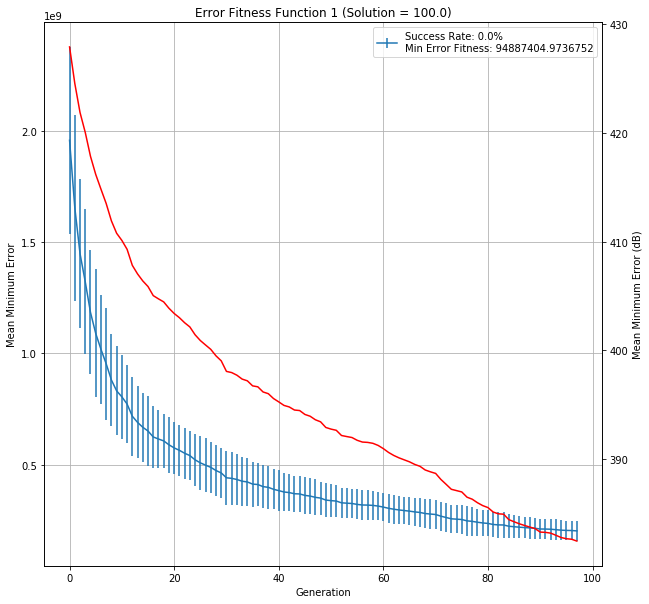

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.1,1.855676e+08,1.675389e+08,2.447970e+08,2.230106e+08,1.472435e+08,1.531749e+08,...,2.389670e+08,1.561561e+08,2.286098e+08,2.978519e+08,1.649138e+08,2.409195e+08,2.133293e+08,2.019787e+08,2:30:57,30000
